In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pwd

'/content'

In [ ]:
%cd '/content/drive/MyDrive/MiniCapstoneProject'

/content/drive/MyDrive/MiniCapstoneProject


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import randint as sp_randint

In [ ]:
df=pd.read_csv('case_time_series (1).csv')

In [ ]:
df.tail()

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
351,15 January,2021-01-15,15155,10543587,16809,10178854,176,151539
352,16 January,2021-01-16,15050,10558637,17202,10196056,181,151720
353,17 January,2021-01-17,13962,10572599,14513,10210569,145,151865
354,18 January,2021-01-18,9987,10582586,17127,10227696,137,152002
355,19 January,2021-01-19,13566,10596152,16976,10244672,154,152156


In [ ]:
df.dtypes

Date               object
Date_YMD           object
Daily Confirmed     int64
Total Confirmed     int64
Daily Recovered     int64
Total Recovered     int64
Daily Deceased      int64
Total Deceased      int64
dtype: object

In [ ]:
df.columns

Index(['Date', 'Date_YMD', 'Daily Confirmed', 'Total Confirmed',
       'Daily Recovered', 'Total Recovered', 'Daily Deceased',
       'Total Deceased'],
      dtype='object')

In [ ]:
df.isna().sum()

Date               0
Date_YMD           0
Daily Confirmed    0
Total Confirmed    0
Daily Recovered    0
Total Recovered    0
Daily Deceased     0
Total Deceased     0
dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Confirmed,356.0,2.976447e+04,2.891718e+04,0.0,1777.00,20402.5,50101.00,97860.0
Total Confirmed,356.0,3.603654e+06,3.982370e+06,1.0,30884.50,1411554.0,7773227.75,10596152.0
Daily Recovered,356.0,2.877717e+04,2.883809e+04,0.0,640.50,19835.0,53165.00,102070.0
Total Recovered,356.0,3.209438e+06,3.771700e+06,0.0,7580.00,902880.0,6963295.50,10244672.0
Daily Deceased,356.0,4.274045e+02,3.789967e+02,0.0,66.50,379.5,701.50,2004.0
Total Deceased,356.0,5.609811e+04,5.713906e+04,0.0,990.75,32475.0,116914.75,152156.0


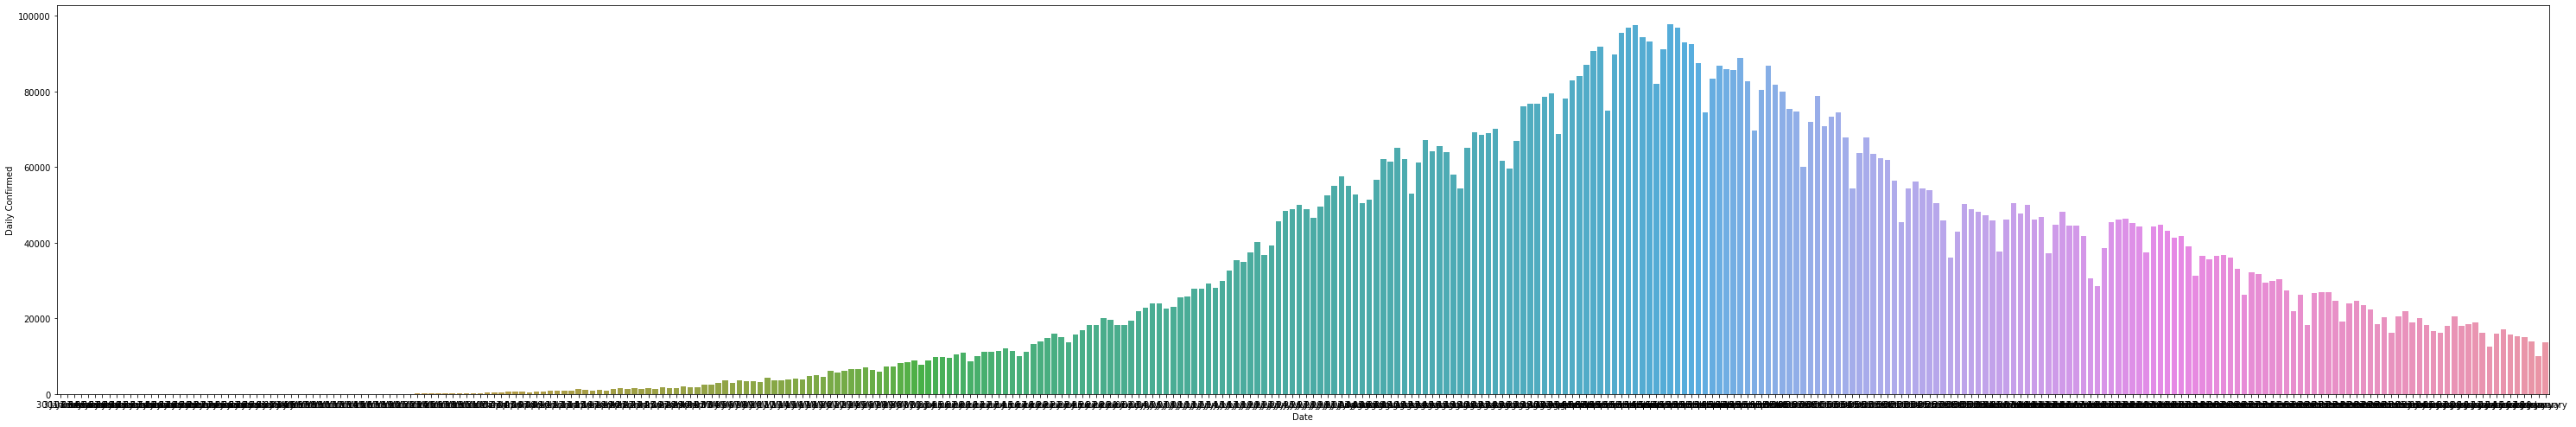

In [ ]:
a4_dims = (51.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='Date',y='Daily Confirmed',data=df)

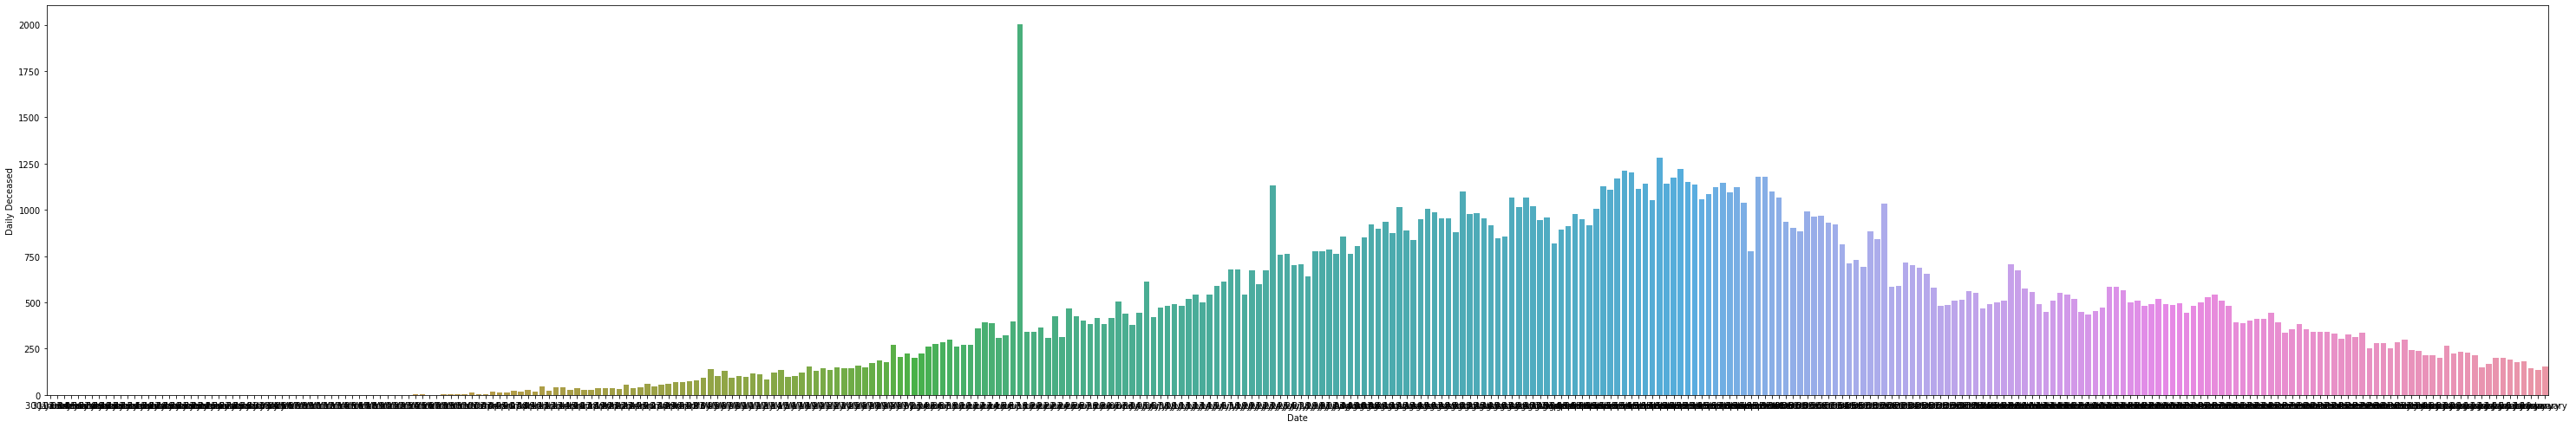

In [ ]:
a4_dims = (51.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='Date',y='Daily Deceased',data=df)

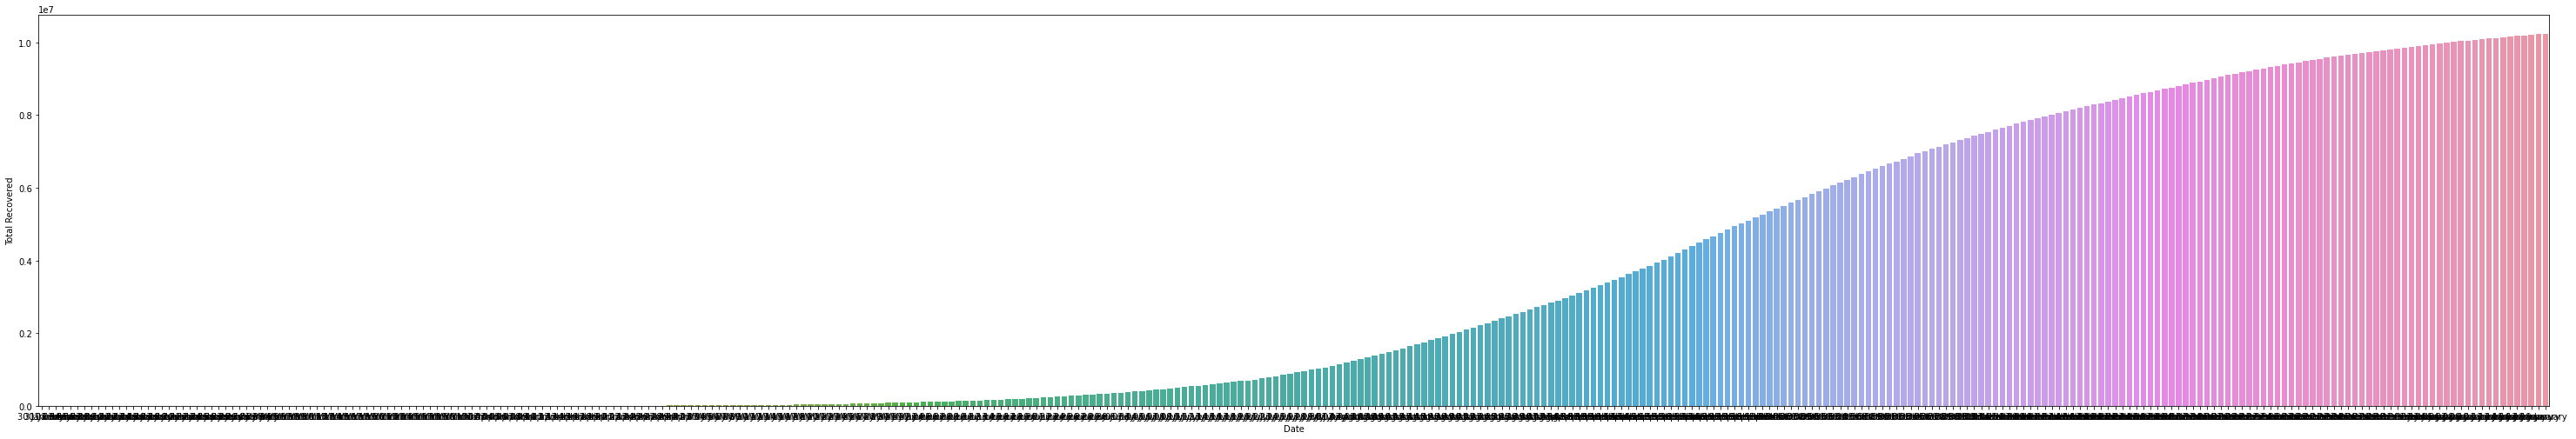

In [ ]:
a4_dims = (51.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='Date',y='Total Recovered',data=df)

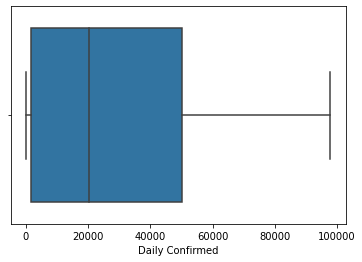

In [ ]:
sns.boxplot(x="Daily Confirmed", data=df)

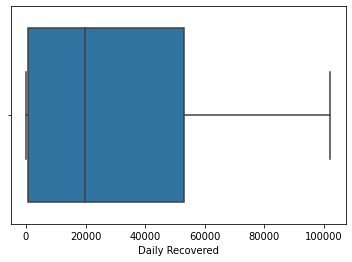

In [ ]:
sns.boxplot(x="Daily Recovered", data=df)

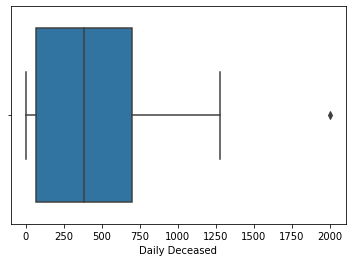

In [ ]:
sns.boxplot(x="Daily Deceased", data=df)

In [ ]:
#Slight outliers found in Daily Deceased which can be handled

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
355,19 January,2021-01-19,13566,10596152,16976,10244672,154,152156


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.


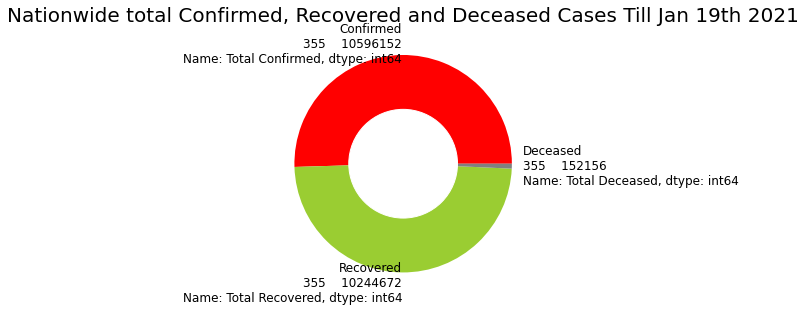

In [ ]:
#Lets visualize the combined data
group_size = [df['Total Confirmed'].tail(1),
              df['Total Recovered'].tail(1),
              df['Total Deceased'].tail(1)]
group_labels = ['Confirmed\n' + str(df['Total Confirmed'].tail(1)),
                'Recovered\n' + str(df['Total Recovered'].tail(1)),
                'Deceased\n' + str(df['Total Deceased'].tail(1))]
custom_colors = ['red','yellowgreen','grey']
plt.figure(figsize = (5,5))
plt.pie(group_size, labels = group_labels, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12)
plt.title('Nationwide total Confirmed, Recovered and Deceased Cases Till Jan 19th 2021', fontsize = 20)
plt.show()

In [ ]:
pip install prophet

     |████████████████████████████████| 92kB 6.5MB/s 
  Created wheel for prophet: filename=prophet-0.1.1.post1-cp36-none-any.whl size=13235 sha256=c90eb48b69ef6929e2282a7e99e7cc2ed42462537e91ba0500f3e258343f8649
  Stored in directory: /root/.cache/pip/wheels/71/d7/4f/0ade9b5843362f84d39c21edbe6065032e388053c4ab0ab83e
Successfully built prophet


In [ ]:
#As part of FB Prophet the data type of the date field should be of DateTime for forecasting
df['Date_YMD'] = pd.to_datetime(df['Date_YMD'])

In [ ]:
df.dtypes

Date                       object
Date_YMD           datetime64[ns]
Daily Confirmed             int64
Total Confirmed             int64
Daily Recovered             int64
Total Recovered             int64
Daily Deceased              int64
Total Deceased              int64
dtype: object

In [ ]:
df_new=df.drop(columns=['Daily Recovered','Total Recovered','Daily Deceased','Total Deceased','Total Confirmed','Date'])
df_new

,Date_YMD,Daily Confirmed
0,2020-01-30,1
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,1
4,2020-02-03,1
...,...,...
351,2021-01-15,15155
352,2021-01-16,15050
353,2021-01-17,13962
354,2021-01-18,9987


In [ ]:
df_new = df_new.rename(columns={'Date_YMD': 'ds','Daily Confirmed':'y'})             
df_new.isna().sum()

ds    0
y     0
dtype: int64

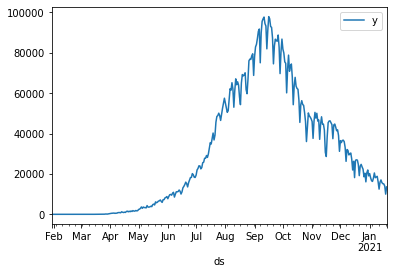

In [ ]:
df_new.plot(x='ds')

In [ ]:
train=df_new[df_new['ds']<'2021-01-01']
test=df_new[df_new['ds']>='2021-01-01']

In [ ]:
test

,ds,y
337,2021-01-01,20159
338,2021-01-02,18144
339,2021-01-03,16678
340,2021-01-04,16278
341,2021-01-05,17909
342,2021-01-06,20472
343,2021-01-07,18123
344,2021-01-08,18453
345,2021-01-09,18820
346,2021-01-10,16086


In [ ]:
from fbprophet import Prophet
model1=Prophet()
model1.add_country_holidays(country_name='IN')
model1.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.6/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



/usr/local/lib/python3.6/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/usr/local/lib/python3.6/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



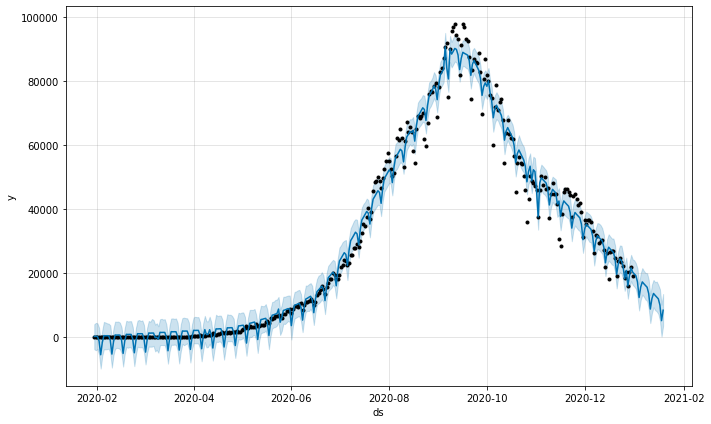

In [ ]:
future = model1.make_future_dataframe(periods=19)

fcst = model1.predict(future)
fig = model1.plot(fcst)

In [ ]:
fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,All Saints Day,All Saints Day_lower,All Saints Day_upper,All Souls Day,All Souls Day_lower,All Souls Day_upper,Boxing Day,Boxing Day_lower,Boxing Day_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Day of Ashura,Day of Ashura_lower,Day of Ashura_upper,Diwali,Diwali_lower,Diwali_upper,Easter Sunday,Easter Sunday_lower,Easter Sunday_upper,Eid al-Fitr,Eid al-Fitr_lower,Eid al-Fitr_upper,Feast of Holy Family,Feast of Holy Family_lower,Feast of Holy Family_upper,Feast of Pentecost,Feast of Pentecost_lower,Feast of Pentecost_upper,Feast of the Blessed Virgin,Feast of the Blessed Virgin_lower,Feast of the Blessed Virgin_upper,Fest of St. Theresa of Calcutta,...,Gandhi Jayanti,Gandhi Jayanti_lower,Gandhi Jayanti_upper,Good Friday,Good Friday_lower,Good Friday_upper,Holi,Holi_lower,Holi_upper,Independence Day,Independence Day_lower,Independence Day_upper,Maundy Thursday,Maundy Thursday_lower,Maundy Thursday_upper,Mawlid,Mawlid_lower,Mawlid_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,Palm Sunday,Palm Sunday_lower,Palm Sunday_upper,Republic Day,Republic Day_lower,Republic Day_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-1038.372797,-3683.850571,4109.747246,-1038.372797,-1038.372797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1338.923256,1338.923256,1338.923256,0.0,0.0,0.0,1338.923256,1338.923256,1338.923256,0.0,0.0,0.0,300.550458
1,2020-01-31,-1008.797031,-4017.657335,4538.606654,-1008.797031,-1008.797031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1335.904201,1335.904201,1335.904201,0.0,0.0,0.0,1335.904201,1335.904201,1335.904201,0.0,0.0,0.0,327.107170
2,2020-02-01,-979.221265,-3612.999269,4381.685294,-979.221265,-979.221265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1289.163610,1289.163610,1289.163610,0.0,0.0,0.0,1289.163610,1289.163610,1289.163610,0.0,0.0,0.0,309.942346
3,2020-02-02,-949.645498,-5424.445751,3018.093865,-949.645498,-949.645498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-161.451255,-161.451255,-161.451255,0.0,0.0,0.0,-161.451255,-161.451255,-161.451255,0.0,0.0,0.0,-1111.096753
4,2020-02-03,-920.069732,-9713.629335,-1480.394533,-920.069732,-920.069732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4493.634357,-4493.634357,-4493.634357,0.0,0.0,0.0,-4493.634357,-4493.634357,-4493.634357,0.0,0.0,0.0,-5413.704089


In [ ]:
forecast = model1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(19)


/usr/local/lib/python3.6/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/usr/local/lib/python3.6/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



,ds,yhat,yhat_lower,yhat_upper
337,2021-01-01,19817.641560,15771.991289,23991.319871
338,2021-01-02,19255.480223,15566.272140,23124.680304
339,2021-01-03,17289.444612,12937.791290,21638.231216
340,2021-01-04,12441.840764,8224.336929,16674.729741
341,2021-01-05,15695.117690,11728.939102,19693.005844
342,2021-01-06,17320.664860,12938.141686,21285.508722
343,2021-01-07,16728.136139,12244.006223,20631.473933
344,2021-01-08,16209.696339,11939.827413,20081.733521
345,2021-01-09,15647.535002,11522.741661,19628.276014
346,2021-01-10,13681.499391,9437.471215,18039.842627


/usr/local/lib/python3.6/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



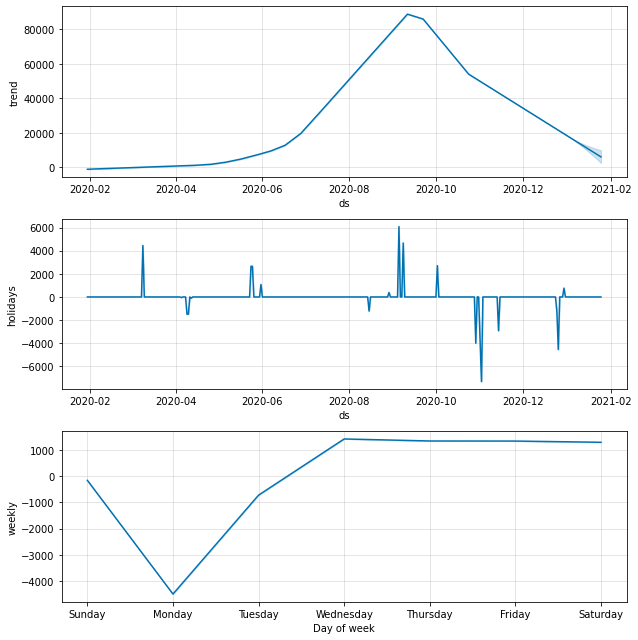

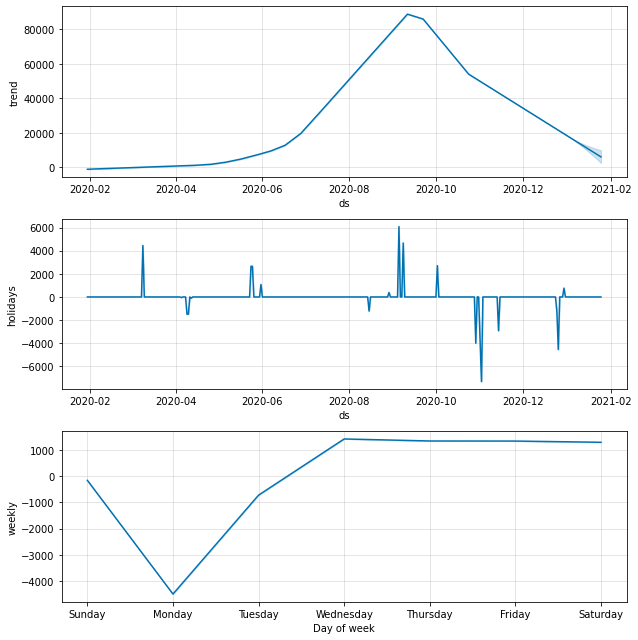

In [ ]:
model1.plot_components(forecast)

/usr/local/lib/python3.6/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



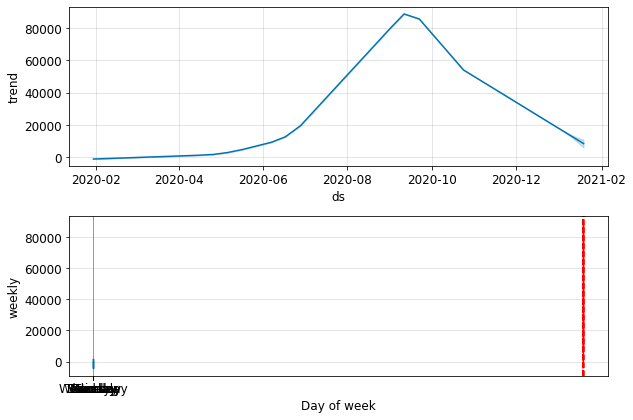

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig=model1.plot_components(forecast)
a=add_changepoints_to_plot(fig.gca(),model1,forecast)

In [ ]:
se = np.square(forecast.loc[337:335, 'yhat'] - test['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)
print(se)

337   NaN
338   NaN
339   NaN
340   NaN
341   NaN
342   NaN
343   NaN
344   NaN
345   NaN
346   NaN
347   NaN
348   NaN
349   NaN
350   NaN
351   NaN
352   NaN
353   NaN
354   NaN
355   NaN
dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

a=mean_absolute_error(test.y, forecast.yhat.tail(19))


In [ ]:
np.sqrt(a)

52.86663552697658